In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [424]:
df = pd.read_table("sleep_merged.tsv")

In [425]:
df.dtypes

Species          object
Genus            object
Order            object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
TotalSleep      float64
Awake           float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

In [426]:
df.head(8)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.000,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
6,Baboon,Papio,Primates,omni,NaN,25.235,180.0,9.4,14.6,9.1,0.7,27.0,180.0,4.0,4.0,4.0
7,Big brown bat,Eptesicus,Chiroptera,insecti,lc,0.023,0.3,19.7,4.3,15.8,3.9,19.0,35.0,1.0,1.0,1.0


# Checking some impossible values
## Sleep + Awake exceeding 24h

In [427]:
df.loc[abs(df.TotalSleep + df.Awake - 24.0) > 0]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.18,0.0,5.6,18.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.00,0.0,2.7,21.35,NaN,0.1,NaN,NaN,NaN,NaN,NaN


In [428]:
df.loc[14,"Awake"] = 18.4
df.loc[61,"Awake"] = 21.3
df.loc[abs(df.TotalSleep + df.Awake - 24.0) > 0].sum()

Species           0
Genus             0
Order             0
Vore              0
Conservation      0
BodyWt          0.0
BrainWt         0.0
TotalSleep      0.0
Awake           0.0
NonDreaming     0.0
Dreaming        0.0
LifeSpan        0.0
Gestation       0.0
Predation       0.0
Exposure        0.0
Danger          0.0
dtype: object

## Dreaming + NonDreaming != TotalSleep

#### Side work on how to detect inconsistencies

In [429]:
#To find the non-corresponding values, using '==' needs some rounding
print(df.TotalSleep[5])
print(df.NonDreaming[5]+df.Dreaming[5])
print(df.Dreaming[5])

df.TotalSleep[5] == df.NonDreaming[5] + df.Dreaming[5]

3.9
3.9000000000000004
1.8


False

In [430]:
round(df.NonDreaming[5]+df.Dreaming[5],2)

3.9

In [431]:
df.TotalSleep[5] == round(df.NonDreaming[5]+df.Dreaming[5],2)

True

### Using > 0.1 instead to detect inconsistencies

In [432]:
df.loc[abs(df.NonDreaming + df.Dreaming - df.TotalSleep) > 0.1]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
6,Baboon,Papio,Primates,omni,NaN,25.235,180.0,9.4,14.6,9.1,0.7,27.0,180.0,4.0,4.0,4.0
9,Brazilian tapir,Tapirus,Perissodactyla,herbi,vu,207.501,169.0,4.4,19.6,5.2,1.0,30.4,392.0,4.0,5.0,4.0
21,Domestic cat,Felis,Carnivora,carni,domesticated,3.300,25.6,12.5,11.5,10.9,3.6,28.0,63.0,1.0,2.0,1.0
25,European hedgehog,Erinaceus,Erinaceomorpha,omni,lc,0.770,3.5,10.1,13.9,6.6,4.1,6.0,42.0,2.0,2.0,2.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.0,9.8,14.2,9.5,1.2,10.4,120.0,2.0,2.0,2.0
27,Genet,Genetta,Carnivora,carni,NaN,2.000,17.5,6.3,17.7,4.8,1.3,34.0,NaN,1.0,2.0,1.0
30,Goat,Capri,Artiodactyla,herbi,lc,33.500,115.0,5.3,18.7,3.3,0.5,20.0,148.0,5.0,5.0,5.0
32,Golden-mantled ground squirrel,Spermophilus,Rodentia,herbi,lc,0.205,4.0,15.9,8.1,10.4,3.4,9.0,28.0,5.0,1.0,3.0
38,Guinea pig,Cavis,Rodentia,herbi,domesticated,0.728,5.5,9.4,14.6,7.4,0.8,7.6,68.0,5.0,3.0,4.0
40,House mouse,Mus,Rodentia,herbi,nt,0.022,0.4,12.5,11.5,11.9,1.3,3.2,19.0,4.0,1.0,3.0


## Let's calculate NonDreaming time from TotalSleep and Dreaming time

In [433]:
for i in range(len(df)):
    if abs(df.NonDreaming[i] + df.Dreaming[i] - df.TotalSleep[i]) > 0.1:
        df.loc[i,"NonDreaming"] = df.loc[i,"TotalSleep"] - df.loc[i,"Dreaming"]

In [434]:
df.loc[abs(df.NonDreaming + df.Dreaming - df.TotalSleep) > 0.1]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger


In [435]:
df.loc[81,:]

Species         Tree shrew
Genus               Tupaia
Order           Scandentia
Vore                  omni
Conservation           NaN
BodyWt               0.104
BrainWt                2.5
TotalSleep             8.9
Awake                 15.1
NonDreaming            6.3
Dreaming               2.6
LifeSpan               2.3
Gestation             46.0
Predation              3.0
Exposure               2.0
Danger                 2.0
Name: 81, dtype: object

## Check NA values

In [436]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [437]:
df.loc[df.NonDreaming.isna(),:]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.00,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.50,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.70,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.00,5.2,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Caspian seal,Phoca,Carnivora,carni,vu,86.000,0.00,3.5,20.5,NaN,0.4,NaN,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.00,12.1,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.00,5.6,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,NaN,1.1,NaN,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill the NA values for the NonDreaming attribute

In [438]:
for i in range(len(df)):
    if (df.NonDreaming.isna()[i] == True):
        if (df.Dreaming.isna()[i] == False):
            df.loc[i,"NonDreaming"] = df.loc[i,"TotalSleep"] - df.loc[i,"Dreaming"]

### The previous action has filled rows 10 and 15 for instance.
### Check that these rows do not appear anymore:

In [439]:
df.loc[df.NonDreaming.isna(),:]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.0,11.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.0,15.8,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,NaN,NaN,39.3,252.0,1.0,4.0,1.0


## Fill NA values on Dreaming

In [440]:
df.loc[df.Dreaming.isna(),:]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.0,11.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.0,15.8,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,NaN,NaN,39.3,252.0,1.0,4.0,1.0


### There is only 1 NA value for index 71 species Tachyglossus where we have the NonDreaming value (8.6), which corresponds to the Total Sleep value. As said in the 2nd reference document (savage-west-2007.pdf), differentiating between REM and non-REM sleep is especially difficult for this species.
### So we'll choose to split this Total Sleep time to the general consensus of 80/20 ratio.

In [441]:
df.loc[71,"Dreaming"] = 1.7
df.loc[71,"NonDreaming"] = 6.9

In [442]:
df.loc[71,:]

Species         Short-nosed echidna
Genus                  Tachyglossus
Order                   Monotremata
Vore                        insecti
Conservation                    NaN
BodyWt                          4.5
BrainWt                        25.0
TotalSleep                      8.6
Awake                          15.4
NonDreaming                     6.9
Dreaming                        1.7
LifeSpan                       50.0
Gestation                      28.0
Predation                       2.0
Exposure                        2.0
Danger                          2.0
Name: 71, dtype: object

## Check NA values once more

In [443]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     23
Dreaming        23
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [444]:
df.loc[df.Dreaming.isna() == True]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.0,11.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.0,15.8,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,NaN,NaN,39.3,252.0,1.0,4.0,1.0


# Total Sleep prediction dataset

## We can replace all NA values of ecological attributes by the mean of each attributes for the same "Order" of animals.

### To do that, we need a function that takes the order as a variable and outputs the mean of each attribute

In [445]:
def meanEco(order: str):
    meanPred = round(df.loc[df.Order == order].Predation.mean())
    meanExp = round(df.loc[df.Order == order].Exposure.mean())
    meanDanger = round(df.loc[df.Order == order].Danger.mean())
    print(order)
    print(meanPred,meanExp,meanDanger, '\n')
    return (meanPred,meanExp,meanDanger)

In [446]:
df.loc[df.Predation.isna() == True].Order.unique()

array(['Rodentia', 'Cetacea', 'Carnivora', 'Hyracoidea', 'Soricomorpha',
       'Primates', 'Diprotodontia', 'Didelphimorphia', 'Pilosa'],
      dtype=object)

In [447]:
meanEco('Rodentia')
# meanEco('Cetacea') -- otherwise round(Nan) returns error
meanEco('Carnivora')
meanEco('Hyracoidea')
meanEco('Soricomorpha')
meanEco('Primates')
meanEco('Diprotodontia')
meanEco('Didelphimorphia')
# meanEco('Pilosa') -- otherwise round(Nan) returns error

Rodentia
4 2 3 

Carnivora
1 2 1 

Hyracoidea
3 2 3 

Soricomorpha
3 1 2 

Primates
2 3 2 

Diprotodontia
2 1 2 

Didelphimorphia
2 1 1 



(2, 1, 1)

### There are 2 particular cases for Cetacea and Pilosa, where no value is available to do mean, so we'll treat them separately.

### Define a function that replaces the NA values

In [448]:
def replaceEco(order: str):
    df.loc[df.Order == order,'Predation'] = df.loc[df.Order == order]['Predation'].replace(np.nan, meanEco(order)[0])
    df.loc[df.Order == order,'Exposure'] = df.loc[df.Order == order]['Exposure'].replace(np.nan, meanEco(order)[1])
    df.loc[df.Order == order,'Danger'] = df.loc[df.Order == order]['Danger'].replace(np.nan, meanEco(order)[2])
    return

### And execute it on the main Orders

In [449]:
replaceEco('Rodentia')
# replaceEco('Cetacea') -- no mean value available
replaceEco('Carnivora')
replaceEco('Hyracoidea')
replaceEco('Soricomorpha')
replaceEco('Primates')
replaceEco('Diprotodontia')
replaceEco('Didelphimorphia')
# replaceEco('Pilosa') -- no mean value available

Rodentia
4 2 3 

Rodentia
4 2 3 

Rodentia
4 2 3 

Carnivora
1 2 1 

Carnivora
1 2 1 

Carnivora
1 2 1 

Hyracoidea
3 2 3 

Hyracoidea
3 2 3 

Hyracoidea
3 2 3 

Soricomorpha
3 1 2 

Soricomorpha
3 1 2 

Soricomorpha
3 1 2 

Primates
2 3 2 

Primates
2 3 2 

Primates
2 3 2 

Diprotodontia
2 1 2 

Diprotodontia
2 1 2 

Diprotodontia
2 1 2 

Didelphimorphia
2 1 1 

Didelphimorphia
2 1 1 

Didelphimorphia
2 1 1 



### For the remaining 'Cetacea' and 'Pilosa' orders, use common sense and assign probable values based on species characteristics and environment

### For 'Pilosa' (Three-toed sloth), use mean values for Primates

In [450]:
df.loc[df.Order == 'Pilosa']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
78,Three-toed sloth,Bradypus,Pilosa,herbi,NaN,3.85,0.0,14.4,9.6,12.2,2.2,NaN,NaN,NaN,NaN,NaN


In [451]:
df.loc[78,'Predation'] = meanEco('Primates')[0]
df.loc[78,'Exposure'] = meanEco('Primates')[1]
df.loc[78,'Danger'] = meanEco('Primates')[2]

Primates
2 3 2 

Primates
2 3 2 

Primates
2 3 2 



In [452]:
df.loc[df.Order == 'Pilosa']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
78,Three-toed sloth,Bradypus,Pilosa,herbi,NaN,3.85,0.0,14.4,9.6,12.2,2.2,NaN,NaN,2.0,3.0,2.0


### For 'Cetacea', 1-1-1 seems appropriate

In [453]:
df.loc[df.Order == 'Cetacea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.33,0.0,5.2,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.18,0.0,5.6,18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.00,0.0,2.7,21.3,2.6,0.1,NaN,NaN,NaN,NaN,NaN


In [454]:
df.loc[8,'Predation'] = 1
df.loc[8,'Exposure'] = 1
df.loc[8,'Danger'] = 1
df.loc[14,'Predation'] = 1
df.loc[14,'Exposure'] = 1
df.loc[14,'Danger'] = 1
df.loc[61,'Predation'] = 1
df.loc[61,'Exposure'] = 1
df.loc[61,'Danger'] = 1

In [455]:
df.loc[df.Order == 'Cetacea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.33,0.0,5.2,18.8,NaN,NaN,NaN,NaN,1.0,1.0,1.0
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.18,0.0,5.6,18.4,NaN,NaN,NaN,NaN,1.0,1.0,1.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.00,0.0,2.7,21.3,2.6,0.1,NaN,NaN,1.0,1.0,1.0


# End of missing ecocological values

# Do a similar work for LifeSpan and Gestation features

In [456]:
df.loc[df.LifeSpan.isna() == True].Order.unique()

array(['Rodentia', 'Cetacea', 'Carnivora', 'Erinaceomorpha', 'Hyracoidea',
       'Soricomorpha', 'Primates', 'Diprotodontia', 'Didelphimorphia',
       'Pilosa'], dtype=object)

In [457]:
df.loc[df.Gestation.isna() == True].Order.unique()

array(['Rodentia', 'Cetacea', 'Carnivora', 'Erinaceomorpha', 'Cingulata',
       'Hyracoidea', 'Soricomorpha', 'Primates', 'Diprotodontia',
       'Didelphimorphia', 'Pilosa'], dtype=object)

### LifeSpan and Gestation can be treated together in 1 function. We just need to handle the 'Cingulata' case separately. For this order, we can replicate the Gestation value from the other armadillo specy.

In [458]:
df.loc[df.Order == 'Cingulata']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
28,Giant armadillo,Priodontes,Cingulata,insecti,en,60.0,81.0,18.1,5.9,12.0,6.1,7.0,NaN,1.0,1.0,1.0
47,Long-nosed armadillo,Dasypus,Cingulata,carni,lc,3.5,10.8,17.4,6.6,14.3,3.1,6.5,120.0,2.0,1.0,1.0


In [459]:
df.loc[28,"Gestation"] = 120

In [460]:
df.loc[df.Order == 'Cingulata']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
28,Giant armadillo,Priodontes,Cingulata,insecti,en,60.0,81.0,18.1,5.9,12.0,6.1,7.0,120.0,1.0,1.0,1.0
47,Long-nosed armadillo,Dasypus,Cingulata,carni,lc,3.5,10.8,17.4,6.6,14.3,3.1,6.5,120.0,2.0,1.0,1.0


In [461]:
def meanLSandGest(order: str):
    meanLS = round(df.loc[df.Order == order].LifeSpan.mean())
    meanGest = round(df.loc[df.Order == order].Gestation.mean())
    print(order)
    print(meanLS,meanGest, '\n')
    return (meanLS,meanGest)

In [462]:
meanLSandGest('Rodentia')
# meanLSandGest('Cetacea')
meanLSandGest('Carnivora')
meanLSandGest('Erinaceomorpha')
meanLSandGest('Hyracoidea')
meanLSandGest('Soricomorpha')
meanLSandGest('Primates')
meanLSandGest('Diprotodontia')
meanLSandGest('Didelphimorphia')
# meanLSandGest('Pilosa')

Rodentia
6 41 

Carnivora
22 102 

Erinaceomorpha
6 42 

Hyracoidea
7 212 

Soricomorpha
3 31 

Primates
32 182 

Diprotodontia
13 17 

Didelphimorphia
4 13 



(4, 13)

### For Pilosa, use mean of 'Primates' as previously, which is close to what is written in Wikipedia anyway (25 to 30 years of lifespan, and 6 months of gestation)

In [463]:
df.loc[df.Order == 'Pilosa']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
78,Three-toed sloth,Bradypus,Pilosa,herbi,NaN,3.85,0.0,14.4,9.6,12.2,2.2,NaN,NaN,2.0,3.0,2.0


In [464]:
df.loc[78,'LifeSpan'] = meanLSandGest('Primates')[0]
df.loc[78,'Gestation'] = meanLSandGest('Primates')[1]

Primates
32 182 

Primates
32 182 



In [465]:
df.loc[df.Order == 'Pilosa']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
78,Three-toed sloth,Bradypus,Pilosa,herbi,NaN,3.85,0.0,14.4,9.6,12.2,2.2,32.0,182.0,2.0,3.0,2.0


### For 'Cetacea', use wikipedia resource

In [466]:
df.loc[df.Order == 'Cetacea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.33,0.0,5.2,18.8,NaN,NaN,NaN,NaN,1.0,1.0,1.0
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.18,0.0,5.6,18.4,NaN,NaN,NaN,NaN,1.0,1.0,1.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.00,0.0,2.7,21.3,2.6,0.1,NaN,NaN,1.0,1.0,1.0


In [467]:
df.loc[8,'LifeSpan'] = 50
df.loc[8,'Gestation'] = 365
df.loc[14,'LifeSpan'] = 10
df.loc[14,'Gestation'] = 315
df.loc[61,'LifeSpan'] = 54
df.loc[61,'Gestation'] = 420

In [468]:
df.loc[df.Order == 'Cetacea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.33,0.0,5.2,18.8,NaN,NaN,50.0,365.0,1.0,1.0,1.0
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.18,0.0,5.6,18.4,NaN,NaN,10.0,315.0,1.0,1.0,1.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.00,0.0,2.7,21.3,2.6,0.1,54.0,420.0,1.0,1.0,1.0


In [469]:
def replaceLSandGest(order: str):
    df.loc[df.Order == order,'LifeSpan'] = df.loc[df.Order == order]['LifeSpan'].replace(np.nan, meanLSandGest(order)[0])
    df.loc[df.Order == order,'Gestation'] = df.loc[df.Order == order]['Gestation'].replace(np.nan, meanLSandGest(order)[1])
    return

In [470]:
replaceLSandGest('Rodentia')
# meanLSandGest('Cetacea')
replaceLSandGest('Carnivora')
replaceLSandGest('Erinaceomorpha')
replaceLSandGest('Hyracoidea')
replaceLSandGest('Soricomorpha')
replaceLSandGest('Primates')
replaceLSandGest('Diprotodontia')
replaceLSandGest('Didelphimorphia')
# meanLSandGest('Pilosa')

Rodentia
6 41 

Rodentia
6 41 

Carnivora
22 102 

Carnivora
22 102 

Erinaceomorpha
6 42 

Erinaceomorpha
6 42 

Hyracoidea
7 212 

Hyracoidea
7 212 

Soricomorpha
3 31 

Soricomorpha
3 31 

Primates
32 182 

Primates
32 182 

Diprotodontia
13 17 

Diprotodontia
13 17 

Didelphimorphia
4 13 

Didelphimorphia
4 13 



# End of filling missing values for LifeSpan and Gestation

In [471]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     23
Dreaming        23
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

## Exploration on NonDreaming and Dreaming missing values

In [472]:
df.loc[df.Dreaming.isna()].Order.unique()

array(['Proboscidea', 'Rodentia', 'Carnivora', 'Cetacea', 'Primates',
       'Artiodactyla'], dtype=object)

In [473]:
df.loc[df.Order == 'Proboscidea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.0,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0


In [474]:
df.loc[df.Order == 'Artiodactyla']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
16,Cow,Bos,Artiodactyla,herbi,domesticated,600.000,423.0,4.0,20.0,3.2,0.7,30.0,281.0,5.0,5.0,5.0
29,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.1,1.6,0.3,28.0,400.0,5.0,5.0,5.0
30,Goat,Capri,Artiodactyla,herbi,lc,33.500,115.0,5.3,18.7,4.8,0.5,20.0,148.0,5.0,5.0,5.0
60,Pig,Sus,Artiodactyla,omni,domesticated,86.250,180.0,9.1,14.9,7.2,1.9,27.0,115.0,4.0,4.0,4.0
68,Roe deer,Capreolus,Artiodactyla,herbi,lc,14.800,98.2,3.0,21.0,NaN,NaN,17.0,150.0,5.0,5.0,5.0
70,Sheep,Ovis,Artiodactyla,herbi,domesticated,55.500,175.0,3.8,20.2,3.2,0.6,20.0,151.0,5.0,5.0,5.0


In [475]:
df.loc[df.Order == 'Primates']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
6,Baboon,Papio,Primates,omni,NaN,25.235,180.0,9.4,14.6,8.7,0.7,27.0,180.0,4.0,4.0,4.0
12,Chimpanzee,Pan,Primates,omni,NaN,52.200,440.0,9.7,14.3,8.3,1.4,50.0,230.0,1.0,1.0,1.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.0,9.8,14.2,8.6,1.2,10.4,120.0,2.0,2.0,2.0
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,NaN,NaN,39.3,252.0,1.0,4.0,1.0
41,Human,Homo,Primates,omni,NaN,62.000,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0
48,Macaque,Macaca,Primates,omni,NaN,6.800,179.0,10.1,13.9,8.9,1.2,29.0,164.0,2.0,3.0,2.0
51,Mongoose lemur,Lemur,Primates,herbi,vu,1.670,0.0,9.5,14.5,8.6,0.9,32.0,182.0,2.0,3.0,2.0
57,Owl monkey,Aotus,Primates,omni,NaN,0.480,15.5,17.0,7.0,15.2,1.8,12.0,140.0,2.0,2.0,2.0
58,Patas monkey,Erythrocebus,Primates,omni,lc,10.000,115.0,10.9,13.1,10.0,0.9,20.2,170.0,4.0,4.0,4.0
63,Potto,Perodicticus,Primates,omni,lc,1.100,0.0,11.0,13.0,NaN,NaN,32.0,182.0,2.0,3.0,2.0


In [476]:
df.loc[df.Order == 'Rodentia']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.60,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.3,NaN,NaN,6.0,41.0,4.0,2.0,3.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.70,16.6,7.4,NaN,NaN,6.0,25.0,5.0,2.0,3.0
13,Chinchilla,Chinchilla,Rodentia,herbi,domesticated,0.420,6.40,12.5,11.5,11.0,1.5,7.0,112.0,5.0,4.0,4.0
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,10.2,1.1,6.0,41.0,4.0,2.0,3.0
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.5,NaN,NaN,6.0,41.0,4.0,2.0,3.0
18,Degu,Octodon,Rodentia,herbi,lc,0.210,0.00,7.7,16.3,6.8,0.9,6.0,41.0,4.0,2.0,3.0
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.00,15.8,8.2,NaN,NaN,6.0,41.0,4.0,2.0,3.0
31,Golden hamster,Mesocricetus,Rodentia,herbi,en,0.120,1.00,14.3,9.7,11.0,3.4,3.9,16.0,3.0,1.0,2.0
32,Golden-mantled ground squirrel,Spermophilus,Rodentia,herbi,lc,0.205,4.00,15.9,8.1,12.5,3.4,9.0,28.0,5.0,1.0,3.0


In [477]:
df.loc[df.Dreaming/df.TotalSleep < 0.1]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
6,Baboon,Papio,Primates,omni,NaN,25.235,180.00,9.4,14.6,8.7,0.7,27.0,180.0,4.0,4.0,4.0
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,10.2,1.1,6.0,41.0,4.0,2.0,3.0
30,Goat,Capri,Artiodactyla,herbi,lc,33.500,115.00,5.3,18.7,4.8,0.5,20.0,148.0,5.0,5.0,5.0
34,Gray hyrax,Heterohyrax,Hyracoidea,herbi,lc,2.625,12.27,6.3,17.7,5.7,0.6,7.0,212.0,3.0,2.0,3.0
38,Guinea pig,Cavis,Rodentia,herbi,domesticated,0.728,5.50,9.4,14.6,8.6,0.8,7.6,68.0,5.0,3.0,4.0
51,Mongoose lemur,Lemur,Primates,herbi,vu,1.670,0.00,9.5,14.5,8.6,0.9,32.0,182.0,2.0,3.0,2.0
58,Patas monkey,Erythrocebus,Primates,omni,lc,10.000,115.00,10.9,13.1,10.0,0.9,20.2,170.0,4.0,4.0,4.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.00,2.7,21.3,2.6,0.1,54.0,420.0,1.0,1.0,1.0
67,Rock hyrax,Procavia,Hyracoidea,herbi,lc,3.600,21.00,5.4,18.6,4.9,0.5,6.0,225.0,3.0,2.0,3.0
80,Tree hyrax,Dendrohyrax,Hyracoidea,herbi,lc,2.950,12.30,5.3,18.7,4.8,0.5,7.5,200.0,3.0,1.0,3.0


In [478]:
df.TotalSleep.describe()

count    87.000000
mean     10.608046
std       4.465793
min       1.900000
25%       8.150000
50%      10.300000
75%      13.750000
max      19.900000
Name: TotalSleep, dtype: float64

In [479]:
df.NonDreaming.describe()

count    64.000000
mean      8.425000
std       3.682434
min       1.600000
25%       6.075000
50%       8.250000
75%      11.050000
max      17.900000
Name: NonDreaming, dtype: float64

# For NonDreaming and Dreaming filling
## It seems that applying ratio 80/20 is reasonable for most Orders, except for Primates (more like 90/10) and elephant (55/45) 

In [480]:
df.loc[df.Order == 'Proboscidea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.0,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0


In [481]:
df.loc[df.Species == 'African elephant',"NonDreaming"] = round(df.loc[df.Species == 'African elephant',"TotalSleep"] * 0.55, 1)
df.loc[df.Species == 'African elephant',"Dreaming"] = round(df.loc[df.Species == 'African elephant',"TotalSleep"] * 0.45, 1)

In [482]:
df.loc[df.Order == 'Proboscidea']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.0,5712.0,3.3,20.7,1.8,1.5,38.6,645.0,3.0,5.0,3.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0


In [483]:
df.loc[df.Order == 'Primates']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
6,Baboon,Papio,Primates,omni,NaN,25.235,180.0,9.4,14.6,8.7,0.7,27.0,180.0,4.0,4.0,4.0
12,Chimpanzee,Pan,Primates,omni,NaN,52.200,440.0,9.7,14.3,8.3,1.4,50.0,230.0,1.0,1.0,1.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.0,9.8,14.2,8.6,1.2,10.4,120.0,2.0,2.0,2.0
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,NaN,NaN,39.3,252.0,1.0,4.0,1.0
41,Human,Homo,Primates,omni,NaN,62.000,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0
48,Macaque,Macaca,Primates,omni,NaN,6.800,179.0,10.1,13.9,8.9,1.2,29.0,164.0,2.0,3.0,2.0
51,Mongoose lemur,Lemur,Primates,herbi,vu,1.670,0.0,9.5,14.5,8.6,0.9,32.0,182.0,2.0,3.0,2.0
57,Owl monkey,Aotus,Primates,omni,NaN,0.480,15.5,17.0,7.0,15.2,1.8,12.0,140.0,2.0,2.0,2.0
58,Patas monkey,Erythrocebus,Primates,omni,lc,10.000,115.0,10.9,13.1,10.0,0.9,20.2,170.0,4.0,4.0,4.0
63,Potto,Perodicticus,Primates,omni,lc,1.100,0.0,11.0,13.0,NaN,NaN,32.0,182.0,2.0,3.0,2.0


In [484]:
df.loc[df.Order == 'Primates',"NonDreaming"] = round(df.loc[df.Order == 'Primates',"TotalSleep"] * 0.9, 1)
df.loc[df.Order == 'Primates',"Dreaming"] = round(df.loc[df.Order == 'Primates',"TotalSleep"] * 0.1, 1)

In [485]:
df.loc[df.Order == 'Primates']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
6,Baboon,Papio,Primates,omni,NaN,25.235,180.0,9.4,14.6,8.5,0.9,27.0,180.0,4.0,4.0,4.0
12,Chimpanzee,Pan,Primates,omni,NaN,52.200,440.0,9.7,14.3,8.7,1.0,50.0,230.0,1.0,1.0,1.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.0,9.8,14.2,8.8,1.0,10.4,120.0,2.0,2.0,2.0
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.0,10.8,1.2,39.3,252.0,1.0,4.0,1.0
41,Human,Homo,Primates,omni,NaN,62.000,1320.0,8.0,16.0,7.2,0.8,100.0,267.0,1.0,1.0,1.0
48,Macaque,Macaca,Primates,omni,NaN,6.800,179.0,10.1,13.9,9.1,1.0,29.0,164.0,2.0,3.0,2.0
51,Mongoose lemur,Lemur,Primates,herbi,vu,1.670,0.0,9.5,14.5,8.6,1.0,32.0,182.0,2.0,3.0,2.0
57,Owl monkey,Aotus,Primates,omni,NaN,0.480,15.5,17.0,7.0,15.3,1.7,12.0,140.0,2.0,2.0,2.0
58,Patas monkey,Erythrocebus,Primates,omni,lc,10.000,115.0,10.9,13.1,9.8,1.1,20.2,170.0,4.0,4.0,4.0
63,Potto,Perodicticus,Primates,omni,lc,1.100,0.0,11.0,13.0,9.9,1.1,32.0,182.0,2.0,3.0,2.0


In [486]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     19
Dreaming        19
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [487]:
df.loc[df.NonDreaming.isna(),'NonDreaming'] = round(df.loc[df.NonDreaming.isna(),'TotalSleep'] * 0.8, 1)
df.loc[df.Dreaming.isna(),'Dreaming'] = round(df.loc[df.Dreaming.isna(),'TotalSleep'] * 0.2, 1)

In [488]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming      0
Dreaming         0
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [489]:
df.loc[df.Order == 'Rodentia']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.60,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.3,7.0,1.7,6.0,41.0,4.0,2.0,3.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.70,16.6,7.4,13.3,3.3,6.0,25.0,5.0,2.0,3.0
13,Chinchilla,Chinchilla,Rodentia,herbi,domesticated,0.420,6.40,12.5,11.5,11.0,1.5,7.0,112.0,5.0,4.0,4.0
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,10.2,1.1,6.0,41.0,4.0,2.0,3.0
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.5,9.2,2.3,6.0,41.0,4.0,2.0,3.0
18,Degu,Octodon,Rodentia,herbi,lc,0.210,0.00,7.7,16.3,6.8,0.9,6.0,41.0,4.0,2.0,3.0
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.00,15.8,8.2,12.6,3.2,6.0,41.0,4.0,2.0,3.0
31,Golden hamster,Mesocricetus,Rodentia,herbi,en,0.120,1.00,14.3,9.7,11.0,3.4,3.9,16.0,3.0,1.0,2.0
32,Golden-mantled ground squirrel,Spermophilus,Rodentia,herbi,lc,0.205,4.00,15.9,8.1,12.5,3.4,9.0,28.0,5.0,1.0,3.0


# Conservation attribute filling

In [490]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming      0
Dreaming         0
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [491]:
df.loc[df.Conservation.isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.60,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.3,7.0,1.7,6.0,41.0,4.0,2.0,3.0
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.50,12.5,11.5,10.0,2.5,14.0,60.0,1.0,1.0,1.0
6,Baboon,Papio,Primates,omni,NaN,25.235,180.00,9.4,14.6,8.5,0.9,27.0,180.0,4.0,4.0,4.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.00,5.2,18.8,4.2,1.0,50.0,365.0,1.0,1.0,1.0
12,Chimpanzee,Pan,Primates,omni,NaN,52.200,440.00,9.7,14.3,8.7,1.0,50.0,230.0,1.0,1.0,1.0
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,10.2,1.1,6.0,41.0,4.0,2.0,3.0
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.5,9.2,2.3,6.0,41.0,4.0,2.0,3.0
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.00,15.8,8.2,12.6,3.2,6.0,41.0,4.0,2.0,3.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.00,9.8,14.2,8.8,1.0,10.4,120.0,2.0,2.0,2.0


In [492]:
df.loc[df.Order == 'Carnivora']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,10.0,2.5,14.0,60.0,1.0,1.0,1.0
10,Caspian seal,Phoca,Carnivora,carni,vu,86.000,0.0,3.5,20.5,3.1,0.4,22.0,102.0,1.0,2.0,1.0
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.9,9.7,2.4,22.0,102.0,1.0,2.0,1.0
20,Dog,Canis,Carnivora,carni,domesticated,14.000,70.0,10.1,13.9,7.2,2.9,22.0,102.0,1.0,2.0,1.0
21,Domestic cat,Felis,Carnivora,carni,domesticated,3.300,25.6,12.5,11.5,8.9,3.6,28.0,63.0,1.0,2.0,1.0
27,Genet,Genetta,Carnivora,carni,NaN,2.000,17.5,6.3,17.7,5.0,1.3,34.0,102.0,1.0,2.0,1.0
35,Gray seal,Haliochoerus,Carnivora,carni,lc,85.000,325.0,6.2,17.8,4.7,1.5,41.0,310.0,1.0,3.0,1.0
36,Gray wolf,Canis,Carnivora,carni,lc,36.330,119.5,13.0,11.0,10.4,2.6,16.2,63.0,1.0,1.0,1.0
42,Jaguar,Panthera,Carnivora,carni,nt,100.000,157.0,10.4,13.6,8.3,2.1,22.4,100.0,1.0,1.0,1.0
45,Lion,Panthera,Carnivora,carni,vu,161.499,0.0,13.5,10.5,10.8,2.7,22.0,102.0,1.0,2.0,1.0


In [493]:
df.Conservation.unique()

array(['vu', nan, 'lc', 'en', 'domesticated', 'cd', 'cr', 'nt'],
      dtype=object)

## According to IUCN Red List of Threatened Species, there are 9 categories of Conservation status: Not Evaluated, Data Deficient, Least Concern, Near Threatened, Vulnerable, Endangered, Critically Endangered, Extinct in the Wild and Extinct.

### 'cd' is not in the list of IUCN, but it is visible in the dataset

In [494]:
df.loc[df.Conservation == 'cd']

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
29,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.1,1.6,0.3,28.0,400.0,5.0,5.0,5.0
61,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.0,2.7,21.3,2.6,0.1,54.0,420.0,1.0,1.0,1.0


## We fix those 2 with latest info from IUCN

In [495]:
df.loc[df.Species == 'Giraffe','Conservation'] = 'vu'
df.loc[df.Species == 'Pilot whale','Conservation'] = 'lc'

### We then look at the cases of NaN

In [496]:
df.loc[df.Conservation.isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.60,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.3,7.0,1.7,6.0,41.0,4.0,2.0,3.0
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.50,12.5,11.5,10.0,2.5,14.0,60.0,1.0,1.0,1.0
6,Baboon,Papio,Primates,omni,NaN,25.235,180.00,9.4,14.6,8.5,0.9,27.0,180.0,4.0,4.0,4.0
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.00,5.2,18.8,4.2,1.0,50.0,365.0,1.0,1.0,1.0
12,Chimpanzee,Pan,Primates,omni,NaN,52.200,440.00,9.7,14.3,8.7,1.0,50.0,230.0,1.0,1.0,1.0
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.7,10.2,1.1,6.0,41.0,4.0,2.0,3.0
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.5,9.2,2.3,6.0,41.0,4.0,2.0,3.0
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.00,15.8,8.2,12.6,3.2,6.0,41.0,4.0,2.0,3.0
26,Galago,Galago,Primates,omni,NaN,0.200,5.00,9.8,14.2,8.8,1.0,10.4,120.0,2.0,2.0,2.0


## We fix all these NaN using search from IUCN website
### Most of the species are classified 'lc' in IUCN. So we first fill the species different from 'lc':

In [497]:
df.loc[12,'Conservation'] = 'en'
df.loc[17,'Conservation'] = 'nt'
df.loc[46,'Conservation'] = 'en'
df.loc[48,'Conservation'] = 'en'
df.loc[62,'Conservation'] = 'vu'
df.loc[65,'Conservation'] = 'vu'
df.loc[72,'Conservation'] = 'en'
df.loc[73,'Conservation'] = 'nt'
df.loc[78,'Conservation'] = 'cr'

In [498]:
df.isna().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    20
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming      0
Dreaming         0
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

### Then we replace all NaN values by 'lc'

In [499]:
df.loc[:,"Conservation"].replace(np.nan,'lc',inplace = True)

In [500]:
df.isna().sum()

Species         0
Genus           0
Order           0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Awake           0
NonDreaming     0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

# We now have filled all NA values. We now convert text attributes to numerical

### For Conservation feature, we set an increasing order as defined by IUCN

In [501]:
df.loc[:,'Conservation'].replace('domesticated', 0, inplace = True)
df.loc[:,'Conservation'].replace('lc', 1, inplace = True)
df.loc[:,'Conservation'].replace('nt', 2, inplace = True)
df.loc[:,'Conservation'].replace('vu', 3, inplace = True)
df.loc[:,'Conservation'].replace('en', 4, inplace = True)
df.loc[:,'Conservation'].replace('cr', 5, inplace = True)

### For Vore, we use alphabetical order

In [502]:
df.Vore.unique()

array(['herbi', 'omni', 'carni', 'insecti'], dtype=object)

In [503]:
df.loc[:,'Vore'].replace('carni', 0, inplace = True)
df.loc[:,'Vore'].replace('herbi', 1, inplace = True)
df.loc[:,'Vore'].replace('insecti', 2, inplace = True)
df.loc[:,'Vore'].replace('omni', 3, inplace = True)

In [504]:
df

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,1,3,6654.000,5712.0,3.3,20.7,1.8,1.5,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,3,1,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,3,1,0.044,0.0,8.7,15.3,7.0,1.7,6.0,41.0,4.0,2.0,3.0
3,Arctic fox,Vulpes,Carnivora,0,1,3.380,44.5,12.5,11.5,10.0,2.5,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,1,1,0.920,5.7,16.6,7.4,13.3,3.3,6.0,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,Cercopithecus,Primates,3,1,4.750,58.0,10.0,14.0,9.0,1.0,24.0,210.0,4.0,3.0,4.0
83,Vesper mouse,Calomys,Rodentia,1,1,0.045,0.0,7.0,17.0,5.6,1.4,6.0,41.0,4.0,2.0,3.0
84,Vole,Microtus,Rodentia,1,1,0.035,0.0,12.8,11.2,10.2,2.6,6.0,41.0,4.0,2.0,3.0
85,Water opossum,Chironectes,Didelphimorphia,0,1,3.500,3.9,19.4,4.6,12.8,6.6,3.0,14.0,2.0,1.0,1.0


# STOP here for data modification as remaining features contain too many possible values
# Explore now the correlation between attributes and other stuff

In [505]:
df.corr(numeric_only=True)

,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
Vore,1.000000,-0.097105,-0.074772,-0.010725,0.065652,-0.065652,0.111007,-0.077289,-0.008107,-0.093879,0.165166,0.018454,0.173050
Conservation,-0.097105,1.000000,0.199041,0.230016,0.104514,-0.104514,0.128151,0.011297,0.193668,0.235569,-0.372496,-0.031176,-0.306669
BodyWt,-0.074772,0.199041,1.000000,0.925683,-0.310147,0.310147,-0.350535,-0.102777,0.310604,0.648930,0.042528,0.355034,0.131916
BrainWt,-0.010725,0.230016,0.925683,1.000000,-0.319661,0.319661,-0.358952,-0.111981,0.457524,0.689073,0.036404,0.387882,0.156729
TotalSleep,0.065652,0.104514,-0.310147,-0.319661,1.000000,-1.000000,0.970047,0.759602,-0.440972,-0.635324,-0.210039,-0.546719,-0.415168
Awake,-0.065652,-0.104514,0.310147,0.319661,-1.000000,1.000000,-0.970047,-0.759602,0.440972,0.635324,0.210039,0.546719,0.415168
NonDreaming,0.111007,0.128151,-0.350535,-0.358952,0.970047,-0.970047,1.000000,0.578896,-0.406529,-0.624312,-0.175896,-0.513970,-0.365533
Dreaming,-0.077289,0.011297,-0.102777,-0.111981,0.759602,-0.759602,0.578896,1.000000,-0.391702,-0.461373,-0.235477,-0.460274,-0.416614
LifeSpan,-0.008107,0.193668,0.310604,0.457524,-0.440972,0.440972,-0.406529,-0.391702,1.000000,0.688113,-0.255422,0.358570,-0.053745
Gestation,-0.093879,0.235569,0.648930,0.689073,-0.635324,0.635324,-0.624312,-0.461373,0.688113,1.000000,-0.007130,0.558424,0.208973


In [506]:
import plotly.express as px

In [507]:
px.imshow(df.corr(numeric_only=True))

c:\Users\kench\anaconda3\envs\python_bootcamp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\kench\anaconda3\envs\python_bootcamp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



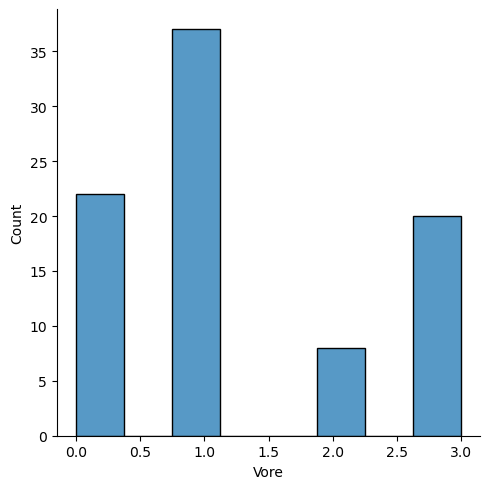

In [508]:
sns.displot(df.Vore)

# Need to remove the non-numerical attributes, and also Awake, NonDreaming and Dreaming features, as these are linked to TotalSleep

In [509]:
df_processed = df.drop(columns=["Species","Genus","Order","Awake","NonDreaming","Dreaming"])

In [510]:
df_processed

,Vore,Conservation,BodyWt,BrainWt,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,1,3,6654.000,5712.0,3.3,38.6,645.0,3.0,5.0,3.0
1,3,1,1.000,6.6,8.3,4.5,42.0,3.0,1.0,3.0
2,3,1,0.044,0.0,8.7,6.0,41.0,4.0,2.0,3.0
3,0,1,3.380,44.5,12.5,14.0,60.0,1.0,1.0,1.0
4,1,1,0.920,5.7,16.6,6.0,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
82,3,1,4.750,58.0,10.0,24.0,210.0,4.0,3.0,4.0
83,1,1,0.045,0.0,7.0,6.0,41.0,4.0,2.0,3.0
84,1,1,0.035,0.0,12.8,6.0,41.0,4.0,2.0,3.0
85,0,1,3.500,3.9,19.4,3.0,14.0,2.0,1.0,1.0


# Model training and evaluation

In [511]:
from sklearn.model_selection import train_test_split

In [512]:
df_train, df_test = train_test_split(df_processed,test_size = 0.3)

In [513]:
print(df_processed.TotalSleep.mean())
print(df_train.TotalSleep.mean())
print(df_test.TotalSleep.mean())

10.608045977011493
10.323333333333332
11.240740740740739


In [514]:
df_train.columns

Index(['Vore', 'Conservation', 'BodyWt', 'BrainWt', 'TotalSleep', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger'],
      dtype='object')

In [515]:
# get the values of the columns for the training data
X_train = df_train.loc[:,['Vore', 'Conservation', 'BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']].values
y_train = df_train.TotalSleep.values

In [516]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['Vore', 'Conservation', 'BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']].values
y_test = df_test.TotalSleep.values

In [517]:
from sklearn.linear_model import LinearRegression

In [518]:
# here we initialize the model
lr_model = LinearRegression()  

In [519]:
# here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [520]:
y_test_predicted = np.round(lr_model.predict(X_test),1)

In [521]:
(abs(y_test_predicted - y_test) < 1).sum()/len(y_test)

0.25925925925925924

In [522]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn import preprocessing

In [523]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_predicted)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predicted)) 

mean_squared_error :  8.450000000000001
mean_absolute_error :  2.32962962962963


# Let's try a Random Forest model

In [524]:
from sklearn.ensemble import RandomForestRegressor

In [525]:
# Try an ensemble classifier: Random Forest
rf_model = RandomForestRegressor(random_state=0)

In [526]:
rf_model.fit(X=X_train,y=y_train)

RandomForestRegressor(random_state=0)

In [527]:
y_test_predicted_rf = np.round(rf_model.predict(X_test),1)

In [528]:
y_test_predicted_rf

array([ 3.3, 12.3, 10.8,  6.9, 16.4, 13.1, 10.9, 11.5, 11. ,  5. , 12.9,
        8.2,  3.6,  9. , 12.4, 14.5,  5.7, 14.9, 10.2, 10.2, 10.8, 11.7,
       12. , 10.7,  9.8,  3.7, 12.2])

In [529]:
(abs(y_test_predicted_rf - y_test) < 1).sum()/len(y_test)

0.2962962962962963

In [530]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_predicted_rf)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predicted_rf)) 

mean_squared_error :  8.35777777777778
mean_absolute_error :  2.177777777777778


## Due to the low number of training data (<100), using Neural Networks is not recommended. Instead, we can try Ridge Regression, Kernel Ridge Regression and Lasso Regression

In [531]:
from sklearn.linear_model import Ridge

In [532]:
ri_model = Ridge(alpha=1.0)

In [533]:
ri_model.fit(X=X_train,y=y_train)

Ridge()

In [534]:
y_test_predicted_ri = np.round(ri_model.predict(X_test),1)

In [535]:
y_test_predicted_ri

array([ 2.1, 13.5, 11.8,  7.2, 14.2, 12. , 10.1, 11.2, 12.5,  5.9, 10. ,
       10.9,  3. , 11.6, 11.3, 15.2,  2.3, 15.2, 12.1, 10.1, 13.5, 14.5,
       14.5, 10.6, 13.3,  4.2, 11.3])

In [536]:
(abs(y_test_predicted_ri - y_test) < 1).sum()/len(y_test)

0.2962962962962963

In [537]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_predicted_ri)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predicted_ri)) 

mean_squared_error :  7.993333333333333
mean_absolute_error :  2.274074074074074


## Try Kernel Ridge regression

In [538]:
from sklearn.kernel_ridge import KernelRidge

In [539]:
kr_model = KernelRidge(alpha=1.0)

In [540]:
kr_model.fit(X_train,y_train)

KernelRidge(alpha=1.0)

In [541]:
y_test_predicted_kr = np.round(kr_model.predict(X_test),1)

In [542]:
(abs(y_test_predicted_kr - y_test) < 1).sum()/len(y_test)

0.25925925925925924

In [543]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_predicted_kr)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predicted_kr)) 

mean_squared_error :  31.405185185185186
mean_absolute_error :  4.466666666666667


## Try Lasso regression

In [544]:
from sklearn import linear_model

In [545]:
la_model = linear_model.Lasso(alpha=0.1)

In [546]:
la_model.fit(X=X_train,y=y_train)

Lasso(alpha=0.1)

In [547]:
y_test_predicted_la = np.round(la_model.predict(X_test),1)

In [548]:
(abs(y_test_predicted_la - y_test) < 1).sum()/len(y_test)

0.37037037037037035

In [549]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_predicted_la)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predicted_la)) 

mean_squared_error :  7.3633333333333315
mean_absolute_error :  2.144444444444445


## Try to use only the attributes as suggested from AllisionScience1976.pdf (body weight and danger) to predict Slow-wave sleep (NonDreaming)

In [550]:
df_processed_sws = df.drop(columns=["Species","Genus","Order","TotalSleep","Awake","Dreaming"])

In [551]:
df_train_sws, df_test_sws = train_test_split(df_processed_sws,test_size = 0.3)

In [552]:
X_train_sws = df_train_sws.loc[:,['BodyWt','Danger']].values
y_train_sws = df_train_sws.NonDreaming.values
X_test_sws = df_test_sws.loc[:,['BodyWt','Danger']].values
y_test_sws = df_test_sws.NonDreaming.values

In [553]:
lr_model_sws = LinearRegression()

In [554]:
lr_model_sws.fit(X=X_train_sws,y=y_train_sws)

LinearRegression()

In [555]:
y_test_predicted_lr_sws = np.round(lr_model_sws.predict(X_test_sws),1)

In [556]:
(abs(y_test_predicted_lr_sws - y_test_sws) < 1).sum()/len(y_test)

0.2222222222222222

In [557]:
print('mean_squared_error : ', mean_squared_error(y_test_sws, y_test_predicted_lr_sws)) 
print('mean_absolute_error : ', mean_absolute_error(y_test_sws, y_test_predicted_lr_sws)) 

mean_squared_error :  10.49148148148148
mean_absolute_error :  2.6851851851851856


## End